In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("Desktop/Analytics_Vidhya/summer training/train_LZV4RXX.csv")
test=pd.read_csv("Desktop/Analytics_Vidhya/summer training/test_4zJg83n.csv")
submission=pd.read_csv("Desktop/Analytics_Vidhya/summer training/sample_submission_tbPU9qQ.csv")

In [3]:
train.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [4]:
test.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.0,Aadhar,636936,768240,2,2,0
1,7002,28,1.0,Aadhar,548988,693060,3,3,0
2,7003,28,1.0,Aadhar,651756,936600,0,0,0
3,7004,45,2.0,Aadhar,614676,744840,4,3,0
4,7005,48,1.0,Aadhar,625236,839400,0,0,0


In [5]:
submission.head()

,loan_id,loan_default
0,7001,1
1,7002,1
2,7003,1
3,7004,1
4,7005,1


In [6]:
train.dtypes

loan_id               int64
age                   int64
education           float64
proof_submitted      object
loan_amount           int64
asset_cost            int64
no_of_loans           int64
no_of_curr_loans      int64
last_delinq_none      int64
loan_default          int64
dtype: object

In [7]:
#education is of category type
#proof submited is of category type

In [8]:
train.isnull().sum(),test.isnull().sum()

(loan_id               0
 age                   0
 education           245
 proof_submitted       0
 loan_amount           0
 asset_cost            0
 no_of_loans           0
 no_of_curr_loans      0
 last_delinq_none      0
 loan_default          0
 dtype: int64,
 loan_id              0
 age                  0
 education           92
 proof_submitted      0
 loan_amount          0
 asset_cost           0
 no_of_loans          0
 no_of_curr_loans     0
 last_delinq_none     0
 dtype: int64)

In [9]:
train['education'].value_counts()

2.0    3796
1.0    2959
Name: education, dtype: int64

In [10]:
# we can impute missing value with mode value,i.e in this case 2.0

In [11]:
train1=pd.DataFrame(train)
test1=pd.DataFrame(test)

In [12]:
train1['education']=train1['education'].fillna(2)
test1['education']=test1['education'].fillna(2)

### Univariate Analysis

**AGE**

<AxesSubplot:xlabel='age', ylabel='Density'>

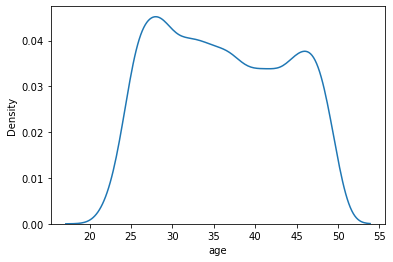

In [13]:
sns.kdeplot('age',data=train) #kdeplot for age columns

In [14]:
train['age'].describe()

count    7000.000000
mean       36.096571
std         7.587700
min        21.000000
25%        29.000000
50%        36.000000
75%        43.000000
max        50.000000
Name: age, dtype: float64

In [15]:
test['age'].describe()

count    3000.000000
mean       36.111000
std         7.467347
min        21.000000
25%        30.000000
50%        36.000000
75%        42.000000
max        50.000000
Name: age, dtype: float64

In [16]:
#we can create bins from age column
# we can divide age into young,middle age and seniors

In [17]:
#creating bins roughly on the basis of equal frequency

In [18]:
bins_age=[15,30,37,45,60]
group_age=['young','midyoung','midsenior','senior']
train1['age_category']=pd.cut(train1['age'], bins_age, labels=group_age)
test1['age_category']=pd.cut(test1['age'],bins_age,labels=group_age)

<AxesSubplot:xlabel='age_category', ylabel='count'>

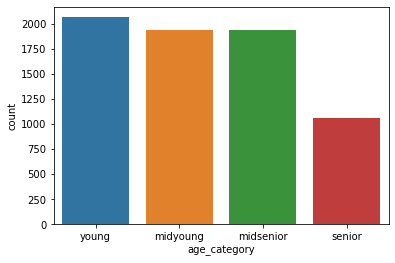

In [19]:
sns.countplot(x='age_category',data=train1)

**LOAN AMOUNT**

<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

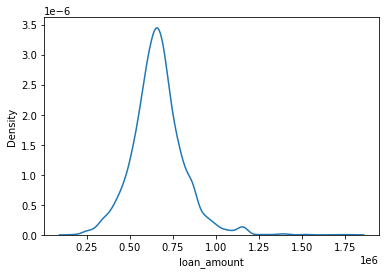

In [20]:
sns.kdeplot('loan_amount',data=train)

C:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amount'>

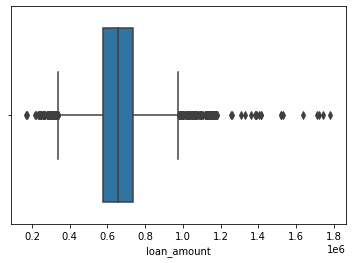

In [21]:
sns.boxplot('loan_amount',data=train)

In [22]:
train['loan_amount'].describe()

count    7.000000e+03
mean     6.633552e+05
std      1.498128e+05
min      1.678800e+05
25%      5.777880e+05
50%      6.571080e+05
75%      7.373640e+05
max      1.781376e+06
Name: loan_amount, dtype: float64

In [23]:
bins_amount=[99000,550000,650000,750000,2000000]
group_amount=['low','mid1','mid2','high']
train1['loan_category']=pd.cut(train1['loan_amount'], bins_amount, labels=group_amount)
test1['loan_category']=pd.cut(test1['loan_amount'],bins_amount,labels=group_amount)

<AxesSubplot:xlabel='loan_category', ylabel='count'>

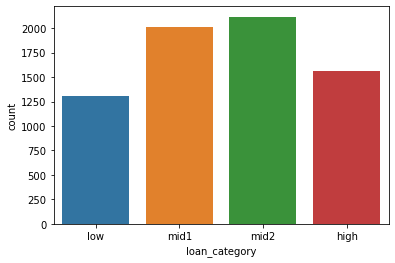

In [24]:
sns.countplot(x='loan_category',data=train1)

**Asset Cost**

<AxesSubplot:xlabel='asset_cost', ylabel='Density'>

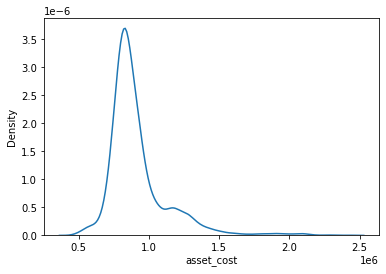

In [25]:
sns.kdeplot('asset_cost',data=train)

C:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='asset_cost'>

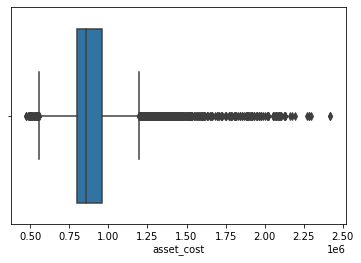

In [26]:
sns.boxplot('asset_cost',data=train)

In [27]:
train['asset_cost'].describe()

count    7.000000e+03
mean     9.162998e+05
std      2.144922e+05
min      4.733520e+05
25%      7.979010e+05
50%      8.584260e+05
75%      9.576750e+05
max      2.419200e+06
Name: asset_cost, dtype: float64

In [28]:
bins_asset=[400000,800000,900000,1200000,2500000]
group_asset=['M1','M2','H1','H2']
train1['asset_category']=pd.cut(train1['asset_cost'], bins_asset, labels=group_asset)
test1['asset_category']=pd.cut(test1['asset_cost'],bins_asset,labels=group_asset)

<AxesSubplot:xlabel='asset_category', ylabel='count'>

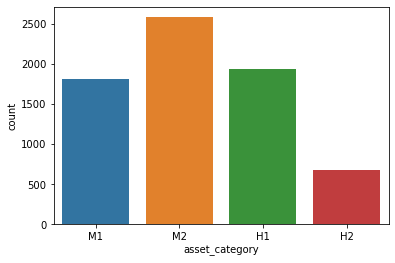

In [29]:
sns.countplot(x='asset_category',data=train1)

**Education**

<AxesSubplot:xlabel='education', ylabel='education'>

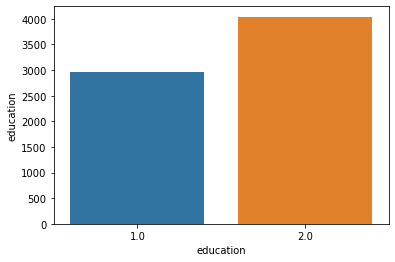

In [30]:
sns.barplot(x=train1['education'],y=train1['education'].value_counts())

In [31]:
train1['education']=train1['education'].astype('int')

**Proof Submitted**

<AxesSubplot:ylabel='proof_submitted'>

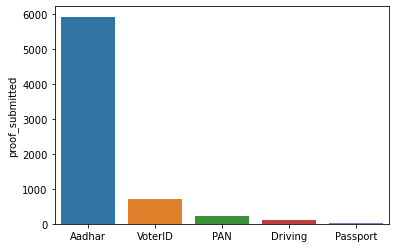

In [32]:
sns.barplot(x=train1['proof_submitted'].value_counts().index,y=train1['proof_submitted'].value_counts())

In [33]:
train1['proof_submitted'].value_counts()

Aadhar      5931
VoterID      707
PAN          235
Driving      114
Passport      13
Name: proof_submitted, dtype: int64

In [34]:
#null hypothesis:- generally, passport,pan is considered safest and is accepted as ID Proof .
#VoterID and Driving licence are not always preferred and may result into fraud

In [35]:
#since, this feature is highly skewed we can use 2 strategies:-
#    1)remove the feature itself
 #   2)encode it with target encoding

**Number of Loans**

<AxesSubplot:xlabel='no_of_loans', ylabel='count'>

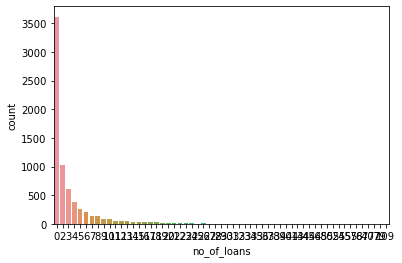

In [36]:
sns.countplot(x='no_of_loans',data=train1)

In [37]:
train1['no_of_loans'].describe()

count    7000.000000
mean        2.853286
std         5.471932
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max       109.000000
Name: no_of_loans, dtype: float64

In [38]:
bins_nol=[-1,1,200]
group_nol=[0,1]
train1['numloan_category']=pd.cut(train1['no_of_loans'], bins_nol, labels=group_nol)
test1['numloan_category']=pd.cut(test1['no_of_loans'],bins_nol,labels=group_nol)

<AxesSubplot:ylabel='numloan_category'>

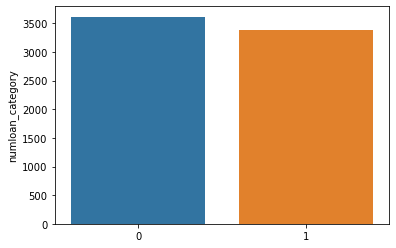

In [39]:
sns.barplot(x=train1['numloan_category'].value_counts().index,y=train1['numloan_category'].value_counts())

**Number of current loans**

<AxesSubplot:xlabel='no_of_curr_loans', ylabel='count'>

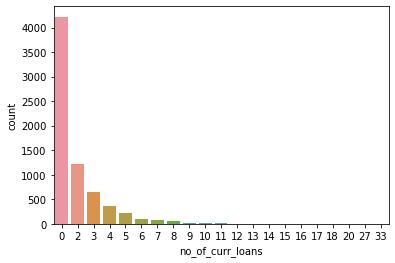

In [40]:
sns.countplot(x='no_of_curr_loans',data=train1)

In [41]:
train1['no_of_curr_loans'].describe()

count    7000.000000
mean        1.371143
std         2.189278
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        33.000000
Name: no_of_curr_loans, dtype: float64

In [42]:
bins_ncl=[-1,1,200]
group_ncl=[0,1]
train1['currloan_category']=pd.cut(train1['no_of_curr_loans'], bins_ncl, labels=group_ncl)
test1['currloan_category']=pd.cut(test1['no_of_curr_loans'],bins_ncl,labels=group_ncl)

<AxesSubplot:ylabel='currloan_category'>

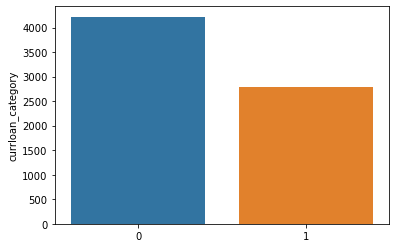

In [43]:
sns.barplot(x=train1['currloan_category'].value_counts().index,y=train1['currloan_category'].value_counts())

**Last Delinq None**

<AxesSubplot:xlabel='last_delinq_none', ylabel='count'>

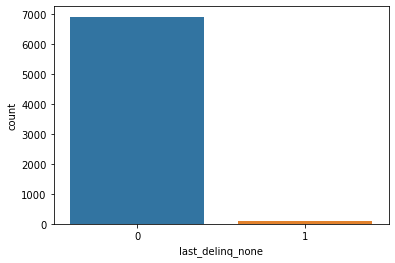

In [44]:
sns.countplot(x='last_delinq_none',data=train1)

In [45]:
train1['last_delinq_none'].value_counts()

0    6907
1      93
Name: last_delinq_none, dtype: int64

**loan_default**

<AxesSubplot:xlabel='loan_default', ylabel='count'>

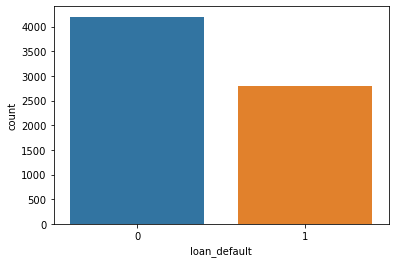

In [46]:
sns.countplot(x='loan_default',data=train1)

In [47]:
train1.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,age_category,loan_category,asset_category,numloan_category,currloan_category
0,1,27,1,Aadhar,504264,820920,2,2,0,0,young,low,M2,1,1
1,2,48,1,Aadhar,728556,831444,6,2,0,0,senior,mid2,M2,1,1
2,3,30,2,VoterID,642936,826092,0,0,0,1,young,mid1,M2,0,0
3,4,28,1,Aadhar,746556,930924,0,0,0,0,young,mid2,H1,0,0
4,5,29,1,Aadhar,1139880,1902000,0,0,0,0,young,high,H2,0,0


In [48]:
test1.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,age_category,loan_category,asset_category,numloan_category,currloan_category
0,7001,29,1.0,Aadhar,636936,768240,2,2,0,young,mid1,M1,1,1
1,7002,28,1.0,Aadhar,548988,693060,3,3,0,young,low,M1,1,1
2,7003,28,1.0,Aadhar,651756,936600,0,0,0,young,mid2,H1,0,0
3,7004,45,2.0,Aadhar,614676,744840,4,3,0,midsenior,mid1,M1,1,1
4,7005,48,1.0,Aadhar,625236,839400,0,0,0,senior,mid1,M2,0,0


In [49]:
train2=pd.DataFrame(train1)

In [50]:
test2=pd.DataFrame(test1)

In [51]:
train2=train2.drop('proof_submitted',axis=1)

In [52]:
test2=test2.drop('proof_submitted',axis=1)

In [53]:
train2['numloan_category']=train2['numloan_category'].astype('int')

In [54]:
train2['currloan_category']=train2['currloan_category'].astype('int')

In [55]:
test2['numloan_category']=test2['numloan_category'].astype('int')
test2['currloan_category']=test2['currloan_category'].astype('int')

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
train2=train2.drop('loan_id',axis=1)

In [58]:
test2=test2.drop('loan_id',axis=1)

In [59]:
train2=pd.get_dummies(train2)

In [60]:
test2=pd.get_dummies(test2)

In [61]:
train2.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,numloan_category,currloan_category,...,age_category_midsenior,age_category_senior,loan_category_low,loan_category_mid1,loan_category_mid2,loan_category_high,asset_category_M1,asset_category_M2,asset_category_H1,asset_category_H2
0,27,1,504264,820920,2,2,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
1,48,1,728556,831444,6,2,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
2,30,2,642936,826092,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,28,1,746556,930924,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,29,1,1139880,1902000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### Bivariate Analysis

**Correlation**

In [62]:
train2.corr()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,numloan_category,currloan_category,...,age_category_midsenior,age_category_senior,loan_category_low,loan_category_mid1,loan_category_mid2,loan_category_high,asset_category_M1,asset_category_M2,asset_category_H1,asset_category_H2
age,1.000000,0.058155,-0.058011,-0.122741,0.193026,0.184503,0.050325,-0.029571,0.215748,0.192885,...,0.445796,0.638950,0.026335,0.013467,0.013024,-0.053596,0.051884,0.046745,-0.022688,-0.119195
education,0.058155,1.000000,0.000562,0.089290,0.020395,-0.002614,0.023521,0.039905,-0.019162,-0.017053,...,0.045384,0.023126,0.022318,-0.000319,-0.024896,0.006919,-0.041162,-0.032952,0.018885,0.086449
loan_amount,-0.058011,0.000562,1.000000,0.735176,0.010867,0.014788,-0.009412,0.115736,0.009989,0.020105,...,-0.040591,-0.022186,-0.638200,-0.250014,0.137555,0.716519,-0.429801,-0.158416,0.238221,0.536309
asset_cost,-0.122741,0.089290,0.735176,1.000000,-0.052643,-0.054021,-0.023489,0.048020,-0.063560,-0.049333,...,-0.086734,-0.047569,-0.284661,-0.253296,-0.079494,0.628783,-0.488264,-0.252803,0.242599,0.771117
no_of_loans,0.193026,0.020395,0.010867,-0.052643,1.000000,0.774705,0.235024,-0.045738,0.538903,0.549275,...,0.117773,0.077117,-0.015642,-0.002354,0.015262,0.000361,0.030859,0.017137,-0.014568,-0.051795
no_of_curr_loans,0.184503,-0.002614,0.014788,-0.054021,0.774705,1.000000,0.272716,-0.057306,0.647273,0.771697,...,0.098697,0.075936,-0.019718,-0.003856,0.020130,0.000437,0.026773,0.028416,-0.025417,-0.047717
last_delinq_none,0.050325,0.023521,-0.009412,-0.023489,0.235024,0.272716,1.000000,0.014772,0.119914,0.140415,...,0.017435,0.024132,0.005281,0.006256,0.002411,-0.014388,0.017004,0.014766,-0.024393,-0.012401
loan_default,-0.029571,0.039905,0.115736,0.048020,-0.045738,-0.057306,0.014772,1.000000,-0.056602,-0.048869,...,-0.037278,-0.002930,-0.098358,-0.045619,0.053718,0.082290,-0.044363,-0.009308,0.031152,0.033853
numloan_category,0.215748,-0.019162,0.009989,-0.063560,0.538903,0.647273,0.119914,-0.056602,1.000000,0.838766,...,0.111703,0.095653,-0.011407,-0.001861,0.013547,-0.002245,0.049772,0.020680,-0.028214,-0.064977
currloan_category,0.192885,-0.017053,0.020105,-0.049333,0.549275,0.771697,0.140415,-0.048869,0.838766,1.000000,...,0.101358,0.082640,-0.016989,-0.005194,0.015032,0.004956,0.027056,0.019954,-0.012830,-0.053399


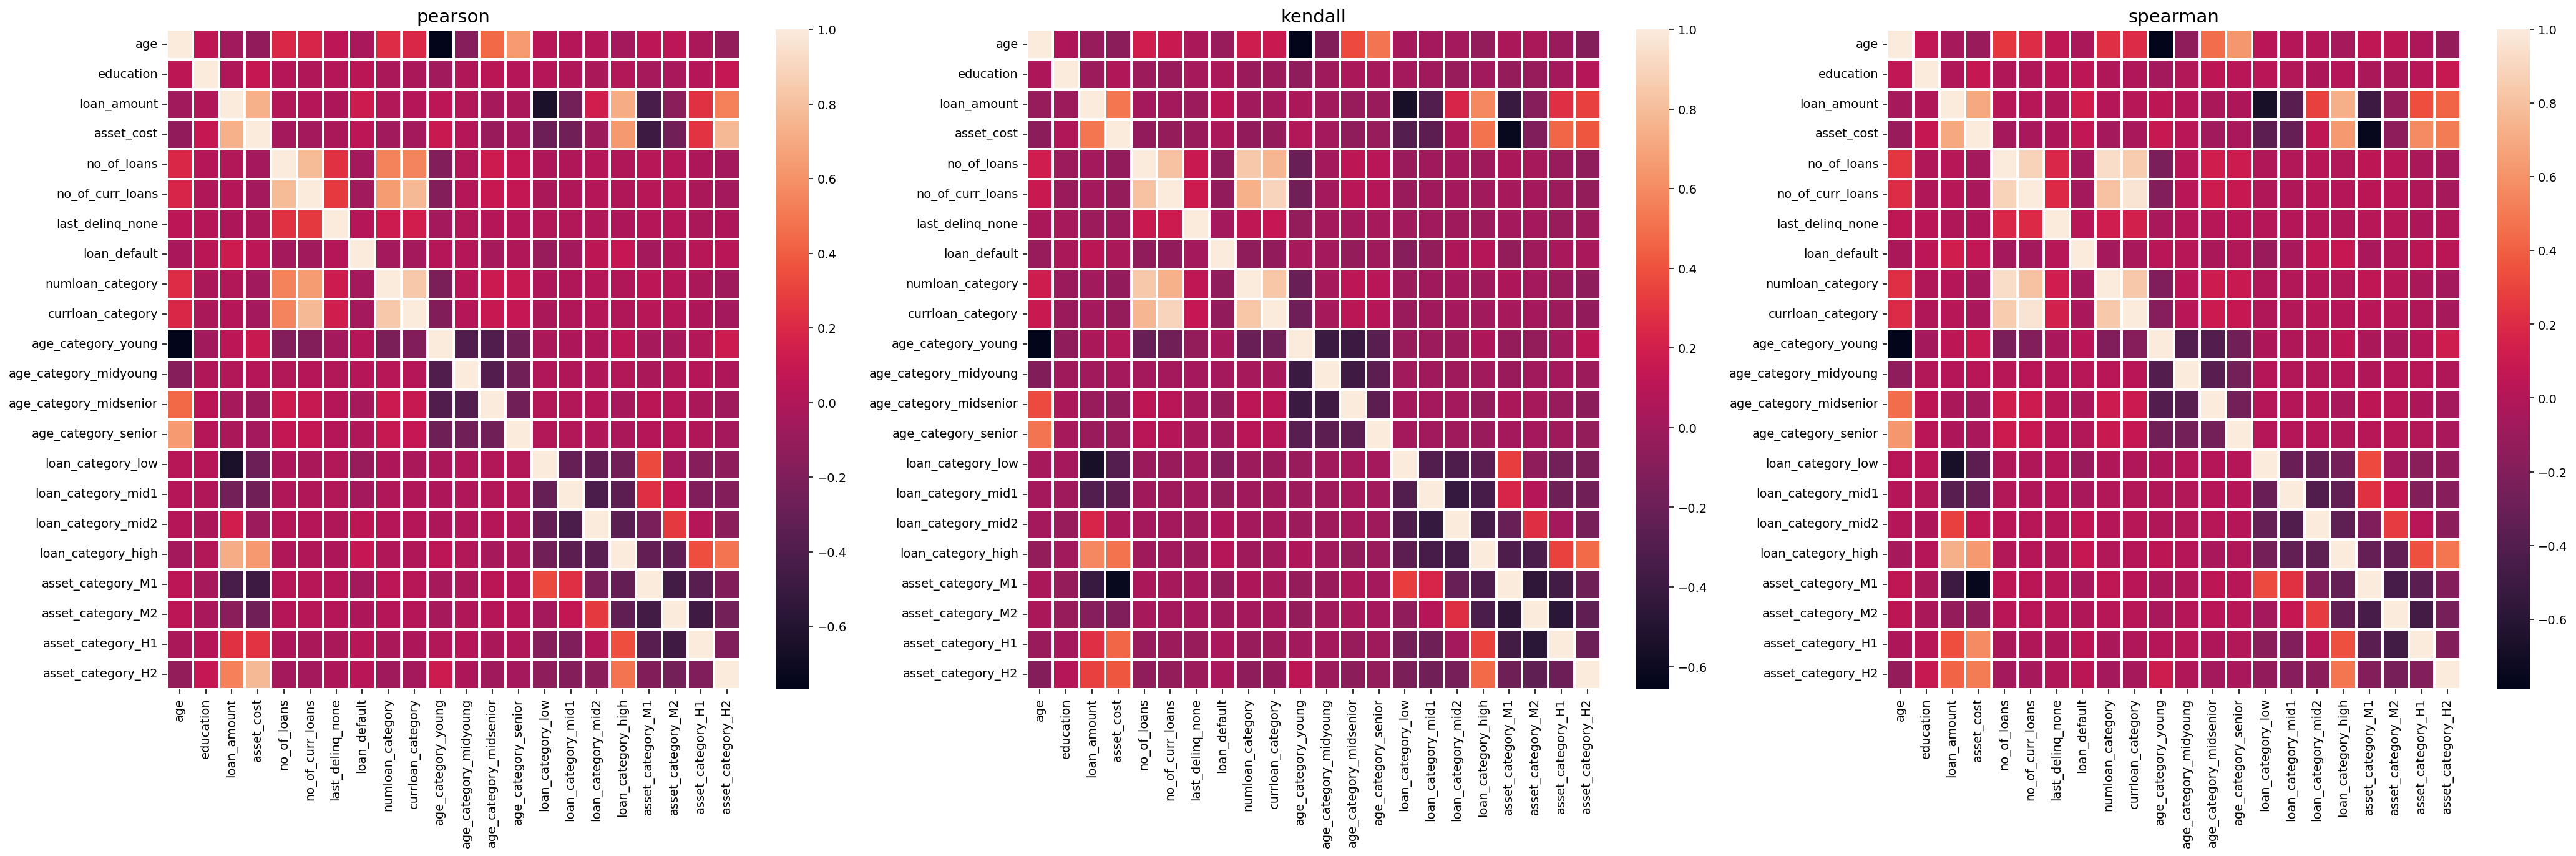

In [63]:
plt.figure(figsize=(36,10),dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation= train2.corr(method=i)
    sns.heatmap(correlation,linewidth=2)
    plt.title(i,fontsize=15)

In [64]:
# we can observe that following feautures are correlated
#1)loan_amonut & Asset Cost
#2)Number of loans & Number of Current loans

### SCALING AND TRAINING THE MODEL

In [65]:
y=pd.DataFrame(train2['loan_default'])

In [66]:
train2=train2.drop('loan_default',axis=1)

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
MinMax=MinMaxScaler()

In [69]:
Minmaxfit=MinMax.fit(train2)

In [70]:
train2=pd.DataFrame(Minmaxfit.transform(train2),columns=train2.columns)
test2=pd.DataFrame(Minmaxfit.transform(test2),columns=test2.columns)

In [71]:
train2.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,numloan_category,currloan_category,age_category_young,...,age_category_midsenior,age_category_senior,loan_category_low,loan_category_mid1,loan_category_mid2,loan_category_high,asset_category_M1,asset_category_M2,asset_category_H1,asset_category_H2
0,0.206897,0.0,0.208481,0.178620,0.018349,0.060606,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.931034,0.0,0.347491,0.184029,0.055046,0.060606,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.310345,1.0,0.294427,0.181278,0.000000,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.241379,0.0,0.358647,0.235153,0.000000,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.275862,0.0,0.602419,0.734203,0.000000,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [72]:
test2.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,numloan_category,currloan_category,age_category_young,...,age_category_midsenior,age_category_senior,loan_category_low,loan_category_mid1,loan_category_mid2,loan_category_high,asset_category_M1,asset_category_M2,asset_category_H1,asset_category_H2
0,0.275862,0.0,0.290708,0.151547,0.018349,0.060606,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.241379,0.0,0.236200,0.112911,0.027523,0.090909,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.241379,0.0,0.299893,0.238070,0.000000,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.827586,1.0,0.276912,0.139522,0.036697,0.090909,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.931034,0.0,0.283457,0.188117,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


#### TRAIN TEST SPLIT

In [73]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(train2,y,random_state=45,stratify=y,test_size=0.2)

In [75]:
from sklearn import tree

In [76]:
dtc=tree.DecisionTreeClassifier()

In [77]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [79]:
pred_tree=dtc.predict(X_test)

In [80]:
from sklearn.metrics import classification_report


In [81]:
print(classification_report(y_test,pred_tree))

              precision    recall  f1-score   support

           0       0.61      0.58      0.59      1260
           1       0.41      0.44      0.42       840

    accuracy                           0.52      2100
   macro avg       0.51      0.51      0.51      2100
weighted avg       0.53      0.52      0.53      2100



In [82]:
from sklearn.model_selection import GridSearchCV

In [116]:
params ={'max_depth':[5,6,7,8,9,10],'criterion':["gini", "entropy", "log_loss"],'min_samples_split':[2,5,10,15,20,25,30,35,45,50,100,200]}
grid = GridSearchCV(cv=5,estimator=dtc,param_grid=params,scoring='f1_macro')
grid.fit(train2, y)
print(grid.best_score_)
print(grid.best_estimator_)

0.5269629535842105
DecisionTreeClassifier(max_depth=10, min_samples_split=10)


In [117]:
dtc2=tree.DecisionTreeClassifier(max_depth=10,min_samples_split=10)

In [118]:
dtc2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=10)

In [119]:
pred2_tree=dtc2.predict(X_test)

In [120]:
print(classification_report(y_test,pred2_tree))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       840
           1       0.47      0.32      0.38       560

    accuracy                           0.59      1400
   macro avg       0.55      0.54      0.54      1400
weighted avg       0.57      0.59      0.57      1400



In [121]:
tree_predictions=dtc2.predict(test2)
submission['loan_default']=tree_predictions
submission.to_csv('Desktop/Analytics_Vidhya/summer training/tree_depth_10_29_1.csv',index=False)